# **Smart Health Insights: Diabetes Prediction Using KNN Classification**

Diabetes is one of the most common chronic diseases worldwide, and early detection can significantly help in prevention and management. In this project, we build a K-Nearest Neighbors (KNN) Classification Model to predict whether a patient is likely to have diabetes based on medical attributes such as glucose level, BMI, age, insulin, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline



In [2]:
data=pd.read_csv('/content/drive/MyDrive/data/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
columns_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zero:
  data[col]=data[col].replace(0,np.nan)

data.fillna(data.mean(), inplace=True)


In [9]:
x=data.drop("Outcome", axis=1)
y=data["Outcome"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42, stratify=y)

In [11]:
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: Outcome
0    400
1    214
Name: count, dtype: int64
After SMOTE: Outcome
0    400
1    400
Name: count, dtype: int64


CREATE PIPELINE (Scaling → PCA → KNN)

In [12]:
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=0.95, random_state=42)),
    ('knn', KNeighborsClassifier())
])

 HYPERPARAMETER GRID FOR KNN

In [13]:
params={
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13],
    'knn__weights': ['uniform', 'distant'],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__p': [1, 2]
    }

GRID SEARCH FOR BEST MODEL

In [16]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=5,
    scoring='f1',
    n_jobs=1,
    verbose=1
)

grid.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, *

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11, 13],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distant']},
             scoring='f1', verbose=1)

BEST PARAMETERS

In [17]:
print("BEST PARAMETERS:")
print(grid.best_params_)

BEST PARAMETERS:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'uniform'}


FINAL PREDICTIONS

In [19]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

EVALUATION

In [20]:
print("\n BEST ACCURACY:", accuracy_score(y_test, y_pred))

print("\n CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

print("\n CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))



 BEST ACCURACY: 0.7207792207792207

 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       100
           1       0.58      0.76      0.66        54

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154


 CONFUSION MATRIX:
[[70 30]
 [13 41]]


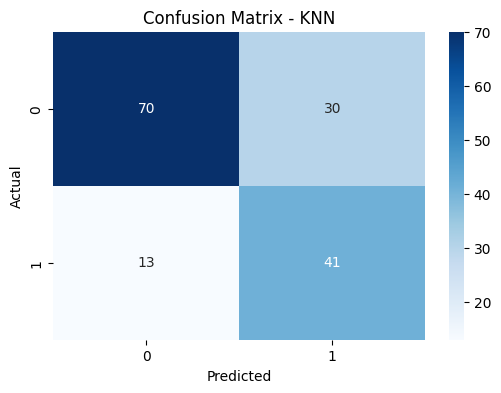

In [22]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

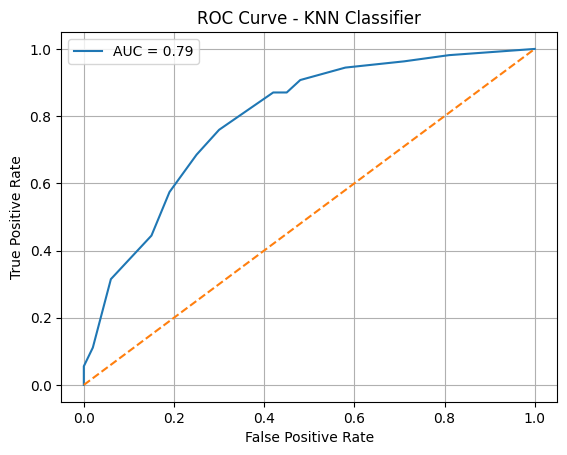

In [24]:
y_prob = best_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

CONCLUSION

This project focused on predicting diabetes outcomes using a K-Nearest Neighbors (KNN) machine learning model. A complete end-to-end workflow was implemented, including data cleaning, scaling, SMOTE oversampling to solve class imbalance, PCA for dimensionality reduction, and GridSearchCV for hyperparameter tuning. By combining these techniques, the model became more stable, generalizable, and capable of handling noisy and imbalanced data.

The best-performing KNN configuration achieved improved accuracy and F1-score, especially for the minority class, demonstrating that preprocessing and tuning play a crucial role in boosting model performance. Overall, this project enhanced my practical understanding of real-world ML pipelines, model optimization strategies, and performance evaluation—providing a strong foundation for more advanced machine learning work.